# **Credit Card Fraud Detection**

## Intro

Credit card fraud refers to any unauthorized or fraudulent use of someone else's credit card information to make purchases or obtain funds. It is a criminal activity and a form of identity theft. Perpetrators may acquire credit card details through various means, such as phishing, skimming, hacking, or even stealing physical credit cards. 

Kaggle dataset has been used [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) which contains credit card transactions made by European cardholders. The dataset consists of 284,807 transactions, out of which 492 are fraudulent. The data contains only numerical input variables which are a result of Principal Component Analysis (PCA) transformations due to confidentiality issues. The features include 'Time', 'Amount', and 'V1' through 'V28', as well as the 'Class' variable, which is the target variable indicating whether the transaction is fraudulent (1) or not (0).

Starting with exploratory data analysis (EDA) to get a better understanding of the data. After that data processing and modeling, where we will build several classification models to predict fraudulent transactions. We will also address the issue of imbalanced classes by using undersampling. Finally, we will evaluate the performance of the models and choose the best one based on various evaluation metrics such as precision, recall, F1-score, and accuracy.

In [2]:
# Import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
# Set plot styles
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [4]:
# Loading the dataset
df = pd.read_csv('/data/creditcard.csv')

# 1. Exploratory Data Analysis

In [12]:
print(df.head())
df.sample(10)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38541,39429.0,-3.792282,-1.884325,1.593999,2.065646,0.946893,-1.028466,-2.173220,1.115125,-0.198280,...,0.165348,0.113077,-1.181172,0.229216,-0.097511,-0.221644,0.278799,-0.837232,1.00,0
88420,62132.0,-3.293850,-3.847285,2.911934,2.030124,3.498663,-2.018612,-2.941702,0.475823,0.211475,...,0.300738,-0.024110,0.504881,0.054312,0.137201,0.576438,-0.215004,-0.060797,10.00,0
60153,49179.0,-2.295876,2.872969,-4.583478,1.760175,-0.928924,-1.794598,-0.537924,1.845176,-0.297104,...,-0.149510,-0.518438,0.004376,-0.454010,-0.157423,-0.347840,0.188702,-0.221555,99.99,0
56004,47230.0,1.074974,-0.690035,0.874424,0.479319,-1.006816,0.433986,-0.778156,0.191234,-0.819355,...,-0.113179,0.190517,-0.105513,0.032572,0.420461,-0.220153,0.081959,0.034388,79.00,0
51625,45045.0,-0.558782,0.555898,1.268724,1.063318,0.082676,-0.157722,0.957642,0.003887,-0.683046,...,0.058055,-0.049736,0.311255,0.030006,-0.510746,-0.515995,0.146566,0.177403,120.40,0
186239,127012.0,1.824509,-0.590304,-2.720844,-0.446965,2.206611,3.422147,-0.691322,0.883283,0.662452,...,-0.030629,-0.238872,0.164893,0.628871,-0.259612,0.435909,-0.029472,-0.016041,99.00,0
46240,42695.0,-0.643574,-0.098227,1.820113,-0.453772,-0.618428,0.171928,0.330003,0.105507,-1.061190,...,-0.021258,0.378360,0.132870,0.050445,-0.235483,-0.420672,0.176813,0.170298,111.50,0
272641,165194.0,1.857734,-1.129218,-1.501117,-0.333867,-0.534760,-0.595659,-0.175690,-0.243139,-0.529797,...,0.066982,0.495419,-0.166039,-0.390342,0.182162,-0.030178,-0.020420,-0.041339,158.00,0
131891,79773.0,1.042699,-1.031839,1.897320,1.193122,-1.877104,0.850767,-1.442909,0.408633,0.615922,...,-0.351954,-0.108073,0.013531,0.414980,0.314695,-0.219197,0.143117,0.051926,57.15,0
212067,138698.0,-0.817820,-0.849112,0.392417,-1.489463,0.864837,-0.664427,0.616823,-0.664507,-0.306024,...,-0.293702,0.549355,0.321735,-0.311605,-0.626429,-0.037192,-0.373353,-0.200693,1.00,0


We can only work with three non-transformed variables which are **Time, Amount, and Class** *(where Class takes values of 1 for fraud and 0 for not fraud)* as prescribed in dataset description.

In [13]:
# printing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# Showing five point summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


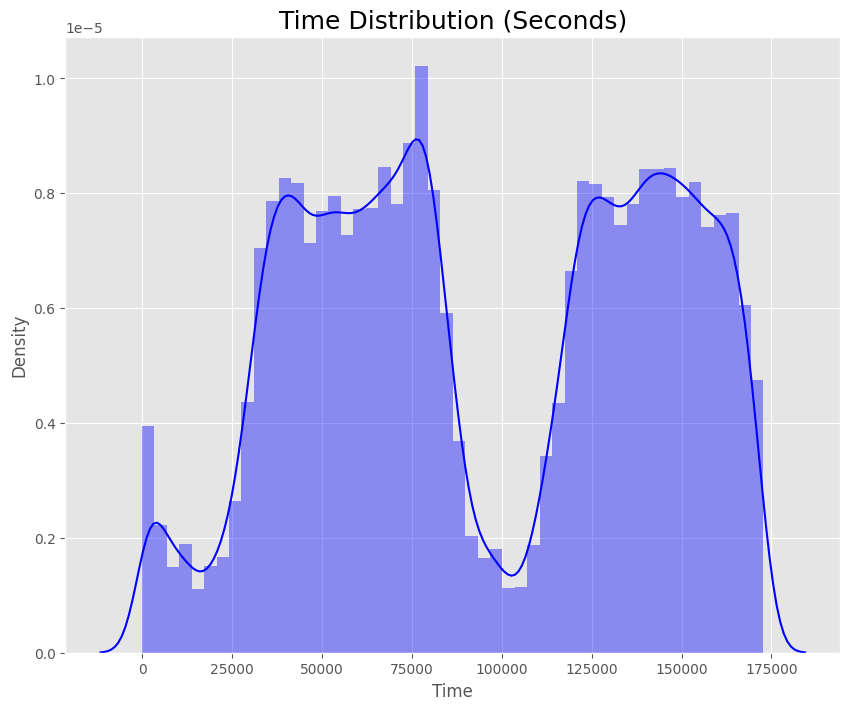

In [6]:
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='blue')
plt.savefig('time_distribution.png')

From the plot, we can observe that the `Time` feature has a bimodal distribution with two peaks, indicating that there are two periods during the day when credit card transactions are more frequent. The first peak occurs at around 50,000 seconds (approximately 14 hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours). This suggests that there may be a pattern in the timing of credit card transactions that could be useful for fraud detection.

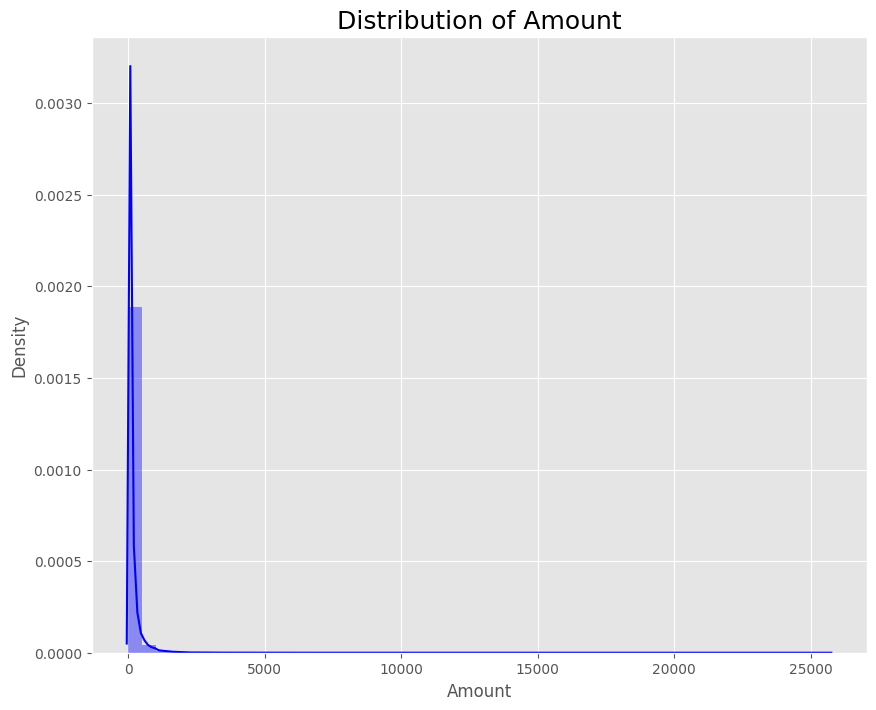

In [7]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')
plt.savefig('amount_distribution.png')

From the plot, we can observe that the distribution of the Amount feature is highly skewed to the right, with a long tail to the right. This indicates that the majority of the transactions have low amounts, while a few transactions have extremely high amounts. This suggests that the dataset contains some outliers in terms of transaction amounts. Therefore, when building a model for fraud detection, it may be necessary to handle outliers in the `Amount` feature, for instance, by using a log transformation or robust statistical methods.

In [5]:
# Finding ratio of Fraud vs Non-Fraud transactions
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Ratio of fraud to non-fraud: 492/284315 (0.173%)


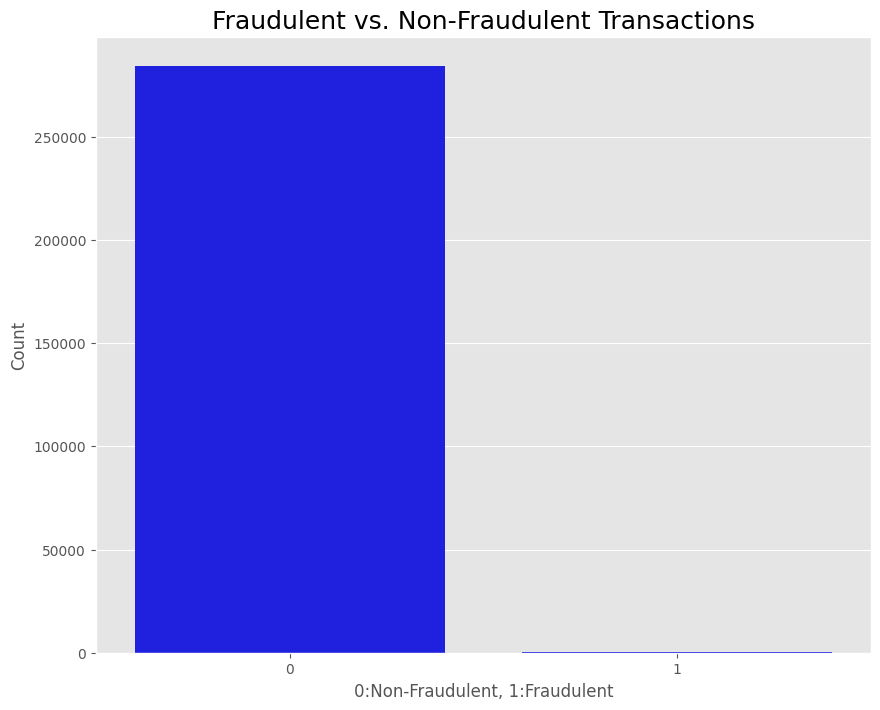

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')
plt.savefig('fraud_vs_nonfraud_transactions.png')

It can be observed that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.